<a href="https://colab.research.google.com/github/hhbb123/hoon/blob/master/condensed%20matter/f_0_BHM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import math
import pylab as plt

In [8]:
def Hamiltonian(t,u,q):
  Hmf=np.zeros((6,6))
  for i in range(0,6):
      Hmf[i][i]=0.5*i*(i-1)-u*i
  for i in range(0,5):
      Hmf[i][i+1]=-t*math.sqrt(i+1)*q*4
      Hmf[i+1][i]=-t*math.sqrt(i+1)*q*4
  for i in range(1,5):
      Hmf[i][i-1]=-t*math.sqrt(i)*q*4
      Hmf[i-1][i]=-t*math.sqrt(i)*q*4

  return Hmf

print(Hamiltonian(1,1,1))

[[-0.         -4.          0.          0.          0.          0.        ]
 [-4.         -1.         -5.65685425  0.          0.          0.        ]
 [ 0.         -5.65685425 -1.         -6.92820323  0.          0.        ]
 [ 0.          0.         -6.92820323  0.         -8.          0.        ]
 [ 0.          0.          0.         -8.          2.         -8.94427191]
 [ 0.          0.          0.          0.         -8.94427191  5.        ]]


In [9]:
T=[]
Q=[]
u_max=1.5
t_max=0.1
for t in np.arange(0,t_max,t_max/1000):
  q=1
  q_prev=100000000
  #for k in range(0,20):
  while abs(q_prev-q)>1e-4:
    D,V=np.linalg.eig(Hamiltonian(t,0.5,q))
    w=V[:,np.argmin(D)]
    q_prev=q
    q=0
    for i in range(0,5):
      q += np.conjugate(w[i])*w[i+1]
  Q.append(q)
  T.append(t)


[0.0, 7.2043626909047945e-09, 5.763432629348499e-08, 1.94512612795627e-07, 4.610561897852216e-07, 9.0047338905871e-07, 1.8030826354333054e-08, 3.340288754541824e-08, 5.698100458983346e-08, 9.126738585546652e-08, 1.390971074371261e-07, 2.0363783715265882e-07, 2.8838951234576354e-07, 3.97183993949608e-07, 5.341846825092126e-07, 7.038861027558224e-07, 9.111134521711543e-07, 1.1610221234047577e-06, 1.459097182420623e-06, 1.811152827268859e-06, 2.2233318006056244e-06, 2.702104780643559e-06, 3.2542697317650367e-06, 3.8869512235920786e-06, 4.607599721060148e-06, 2.618934450770102e-07, 3.1857930924876565e-07, 3.8467414373394273e-07, 4.6130141359984785e-07, 5.496701813079455e-07, 6.510781592287453e-07, 7.669147531229626e-07, 8.986640934344481e-07, 1.0479080507144388e-06, 1.2163292391895437e-06, 1.4057140046187179e-06, 1.6179553996780413e-06, 1.8550561431652316e-06, 2.1191315628480774e-06, 2.412412523394805e-06, 2.737248337867486e-06, 3.0961096659670314e-06, 3.4915913844692243e-06, 3.92641545556

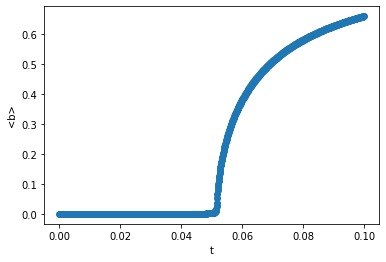

In [11]:
print(Q)
plt.scatter(T,Q)
plt.xlabel('t')
plt.ylabel('<b>')
plt.show()